In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
import plotly.offline as py_offline
import plotly.plotly as py
import plotly.graph_objs as go
from xgboost.sklearn import XGBRegressor
pd.set_option('display.max_columns', None)

/home/zhangtong/.local/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



In [2]:
df = pd.read_csv('prepared.csv')
test = pd.read_csv('test_1.csv')

In [19]:
df.shape

(1458644, 88)

In [20]:
test.shape

(625134, 87)

In [3]:

y_train = df['trip_duration']
X_train = df.drop(['id','passenger_count', 'store_and_fwd_flag', 'trip_duration'], axis=1)
#creat a table first for later submission
result_table = pd.DataFrame(columns =['id', 
                                      'trip_duration'])
result_table['id'] = test['id']
X_test = test.drop(['id', 'passenger_count', 'store_and_fwd_flag'], axis = 1)


In [22]:
X_train.head()

,vendor_id,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,is_weekend,pick_minuteofday,week_delta,no_passengers,one_passenger,few_passengers,many_passengers,is_holiday,pick_businessday,distance,ride_counts,kmean_pickup_time_0,kmean_pickup_time_1,kmean_pickup_time_2,kmean_pickup_time_3,kmean_pickup_time_4,kmean_pickup_time_5,kmean_pickup_time_6,kmean_pickup_time_7,kmean_pickup_time_8,kmean_pickup_time_9,kmean_pickup_time_10,kmean_pickup_time_11,kmean_pickup_time_12,kmean_pickup_time_13,kmean_pickup_time_14,kmean_pickup_time_15,kmean_pickup_time_16,kmean_pickup_time_17,kmean_pickup_time_18,kmean_pickup_time_19,kmean_pickup_time_20,kmean_pickup_time_21,kmean_pickup_time_22,kmean_pickup_time_23,pick_month_1,pick_month_2,pick_month_3,pick_month_4,pick_month_5,pick_month_6,pick_weekday_1,pick_weekday_2,pick_weekday_3,pick_weekday_4,pick_weekday_5,pick_weekday_6,pick_weekday_7,kmeans_pickup_0,kmeans_pickup_1,kmeans_pickup_2,kmeans_pickup_3,kmeans_pickup_4,kmeans_pickup_5,kmeans_pickup_6,kmeans_pickup_7,kmeans_pickup_8,kmeans_pickup_9,kmeans_pickup_10,kmeans_pickup_11,kmeans_pickup_12,kmeans_pickup_13,kmeans_pickup_14,kmeans_dropoff_0,kmeans_dropoff_1,kmeans_dropoff_2,kmeans_dropoff_3,kmeans_dropoff_4,kmeans_dropoff_5,kmeans_dropoff_6,kmeans_dropoff_7,kmeans_dropoff_8,kmeans_dropoff_9,kmeans_dropoff_10,kmeans_dropoff_11,kmeans_dropoff_12,kmeans_dropoff_13,kmeans_dropoff_14,direction
0,2,-73.982155,40.767937,-73.964630,40.765602,0,1044,1.725000,0,1,0,0,0,1,0.932,3241,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,174.333393
1,1,-73.980415,40.738564,-73.999481,40.731152,1,43,7.029861,0,1,0,0,0,0,1.123,7099,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,-178.051723
2,2,-73.979027,40.763939,-74.005333,40.710087,0,695,2.482639,0,1,0,0,0,1,3.970,3280,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,-179.630020
3,2,-74.010040,40.719971,-74.012268,40.706718,0,1172,3.813889,0,1,0,0,0,1,0.924,2221,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,-179.872592
4,2,-73.973053,40.793209,-73.972923,40.782520,1,810,6.562500,0,1,0,0,0,0,0.739,3391,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,179.990814


In [23]:
X_test.head()

,vendor_id,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,is_weekend,pick_minuteofday,week_delta,no_passengers,one_passenger,few_passengers,many_passengers,is_holiday,pick_businessday,distance,ride_counts,kmean_pickup_time_0,kmean_pickup_time_1,kmean_pickup_time_2,kmean_pickup_time_3,kmean_pickup_time_4,kmean_pickup_time_5,kmean_pickup_time_6,kmean_pickup_time_7,kmean_pickup_time_8,kmean_pickup_time_9,kmean_pickup_time_10,kmean_pickup_time_11,kmean_pickup_time_12,kmean_pickup_time_13,kmean_pickup_time_14,kmean_pickup_time_15,kmean_pickup_time_16,kmean_pickup_time_17,kmean_pickup_time_18,kmean_pickup_time_19,kmean_pickup_time_20,kmean_pickup_time_21,kmean_pickup_time_22,kmean_pickup_time_23,pick_month_1,pick_month_2,pick_month_3,pick_month_4,pick_month_5,pick_month_6,pick_weekday_1,pick_weekday_2,pick_weekday_3,pick_weekday_4,pick_weekday_5,pick_weekday_6,pick_weekday_7,kmeans_pickup_0,kmeans_pickup_1,kmeans_pickup_2,kmeans_pickup_3,kmeans_pickup_4,kmeans_pickup_5,kmeans_pickup_6,kmeans_pickup_7,kmeans_pickup_8,kmeans_pickup_9,kmeans_pickup_10,kmeans_pickup_11,kmeans_pickup_12,kmeans_pickup_13,kmeans_pickup_14,kmeans_dropoff_0,kmeans_dropoff_1,kmeans_dropoff_2,kmeans_dropoff_3,kmeans_dropoff_4,kmeans_dropoff_5,kmeans_dropoff_6,kmeans_dropoff_7,kmeans_dropoff_8,kmeans_dropoff_9,kmeans_dropoff_10,kmeans_dropoff_11,kmeans_dropoff_12,kmeans_dropoff_13,kmeans_dropoff_14,direction
0,1,-73.988129,40.732029,-73.990173,40.756680,0,1439,4.999306,0,1,0,0,0,1,1.708,3586,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-0.062854
1,1,-73.964203,40.679993,-73.959808,40.655403,0,1439,4.999306,0,1,0,0,0,1,1.715,258,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,179.864469
2,1,-73.997437,40.737583,-73.986160,40.729523,0,1439,4.999306,0,1,0,0,0,1,0.812,3586,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,178.940121
3,2,-73.956070,40.771900,-73.986427,40.730469,0,1439,4.999306,0,1,0,0,0,1,3.276,3005,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-179.445122
4,1,-73.970215,40.761475,-73.961510,40.755890,0,1439,4.999306,0,1,0,0,0,1,0.597,3005,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,178.819522


In [24]:
X_test.shape

(625134, 84)

In [25]:
X_train.shape

(1458644, 84)

In [26]:
X_train.is_holiday.value_counts()

0    1431393
1      27251
Name: is_holiday, dtype: int64

# Random Forest

In [27]:
from sklearn.metrics import mean_squared_error
def calculate_error(y_test, y_pred):

    log_test = np.log(y_test+1)
    log_pred = np.log(y_pred+1)
    RMSE = np.sqrt(mean_squared_error(log_test, log_pred))
    
    return RMSE

In [28]:
from sklearn.ensemble import RandomForestRegressor as RFR
regr = RFR(n_estimators = 50,
          max_depth = 20,
          min_samples_split = 60,
          verbose = 2,
          random_state = 2)

regr.fit(X_train, y_train)

building tree 1 of 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.2min remaining:    0.0s


building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 47.3min finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=60,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
           oob_score=False, random_state=2, verbose=2, warm_start=False)

In [29]:
regr.feature_importances_

array([  1.85627422e-03,   1.15535730e-01,   1.42478003e-01,
         4.34775783e-02,   4.84586633e-02,   3.32825696e-06,
         6.52236208e-02,   6.47444380e-02,   1.07162124e-04,
         5.36410363e-05,   2.98610552e-04,   9.83208642e-04,
         4.37775465e-04,   1.17992578e-03,   1.08170540e-01,
         3.32773915e-02,   8.28628538e-04,   5.48943427e-04,
         6.18813133e-04,   4.11298236e-04,   4.91175806e-04,
         6.38396363e-04,   6.63314334e-04,   6.44979877e-04,
         1.07760237e-05,   1.79795651e-03,   6.49651039e-04,
         3.13967824e-06,   5.39968300e-04,   5.12774585e-04,
         4.62222036e-04,   2.65067836e-03,   8.57528689e-04,
         4.40694944e-04,   6.33161827e-04,   7.60771448e-04,
         7.76361801e-04,   6.35845291e-04,   3.98697617e-04,
         3.88896433e-04,   4.77254956e-04,   3.89832188e-04,
         4.67694357e-04,   3.17412739e-04,   5.28219304e-04,
         8.00681952e-04,   8.69202176e-06,   4.50476704e-04,
         4.83772329e-04,

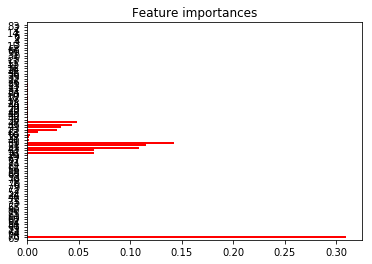

In [30]:
importances = regr.feature_importances_
std = np.std([regr.feature_importances_ for tree in regr.estimators_],
             axis=0)
indices = np.argsort(importances)

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.barh(X_train.columns, importances[indices],
       color="r", xerr=std[indices], align="center")
# If you want to define your own labels,
# change indices to a list of labels on the following line.
plt.yticks(range(X_train.shape[1]), indices)
plt.ylim([-1, X_train.shape[1]])
plt.show()

In [31]:
import operator

dict_feature_imp = dict(zip(list(X_train.columns), regr.feature_importances_))
sorted_feature = sorted(dict_feature_imp.items(), key = operator.itemgetter(1), reverse= True)
sorted_feature

[('direction', 0.30916579674301542),
 ('pickup_latitude', 0.14247800344511008),
 ('pickup_longitude', 0.11553572959152987),
 ('distance', 0.10817053966671367),
 ('pick_minuteofday', 0.065223620848723893),
 ('week_delta', 0.064744438027418236),
 ('dropoff_latitude', 0.048458663296950616),
 ('dropoff_longitude', 0.043477578289413794),
 ('ride_counts', 0.033277391483010732),
 ('kmeans_dropoff_0', 0.028997167461823167),
 ('kmeans_pickup_13', 0.01094310010723203),
 ('kmean_pickup_time_15', 0.0026506783563101603),
 ('vendor_id', 0.0018562742242869479),
 ('kmean_pickup_time_9', 0.0017979565080075512),
 ('pick_businessday', 0.0011799257753407116),
 ('many_passengers', 0.00098320864219717408),
 ('kmean_pickup_time_16', 0.00085752868880318276),
 ('kmean_pickup_time_0', 0.00082862853787667124),
 ('pick_month_6', 0.00080068195214312566),
 ('kmean_pickup_time_20', 0.00077636180135192019),
 ('kmean_pickup_time_19', 0.00076077144834562867),
 ('kmean_pickup_time_6', 0.00066331433432844148),
 ('kmean_p

In [32]:
random_pred = regr.predict(X_test)

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    8.4s finished


In [33]:
random_pred

array([  814.02517267,   683.79547476,   447.3974549 , ...,  1493.58034595,
        2108.10414059,  2565.77069562])

# MLP

In [19]:
from sklearn.neural_network import MLPRegressor

regMLP_t = MLPRegressor(
                hidden_layer_sizes= (10, 3), activation='relu', solver='adam', alpha=0.001, batch_size='auto',
                learning_rate='constant', learning_rate_init=0.01, power_t=0.5, max_iter=1000, shuffle=True,
                random_state=9, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

regMLP_t.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 3), learning_rate='constant',
       learning_rate_init=0.01, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=9, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [20]:
MLP_pred = regMLP_t.predict(X_test)

In [21]:
MLP_pred

array([  561.6918199 ,   891.6563895 ,   402.0036807 , ...,   936.52567137,
        1833.29464991,   935.42972068])

## XGBoost

In [22]:
X_test.head()

,vendor_id,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,is_weekend,pick_minuteofday,week_delta,no_passengers,one_passenger,few_passengers,many_passengers,is_holiday,distance,ride_counts,kmean_pickup_time_0,kmean_pickup_time_1,kmean_pickup_time_2,kmean_pickup_time_3,kmean_pickup_time_4,kmean_pickup_time_5,kmean_pickup_time_6,kmean_pickup_time_7,kmean_pickup_time_8,kmean_pickup_time_9,kmean_pickup_time_10,kmean_pickup_time_11,kmean_pickup_time_12,kmean_pickup_time_13,kmean_pickup_time_14,kmean_pickup_time_15,kmean_pickup_time_16,kmean_pickup_time_17,kmean_pickup_time_18,kmean_pickup_time_19,kmean_pickup_time_20,kmean_pickup_time_21,kmean_pickup_time_22,kmean_pickup_time_23,pick_month_1,pick_month_2,pick_month_3,pick_month_4,pick_month_5,pick_month_6,pick_weekday_1,pick_weekday_2,pick_weekday_3,pick_weekday_4,pick_weekday_5,pick_weekday_6,pick_weekday_7,kmeans_pickup_0,kmeans_pickup_1,kmeans_pickup_2,kmeans_pickup_3,kmeans_pickup_4,kmeans_pickup_5,kmeans_pickup_6,kmeans_pickup_7,kmeans_pickup_8,kmeans_pickup_9,kmeans_pickup_10,kmeans_pickup_11,kmeans_pickup_12,kmeans_pickup_13,kmeans_pickup_14,kmeans_dropoff_0,kmeans_dropoff_1,kmeans_dropoff_2,kmeans_dropoff_3,kmeans_dropoff_4,kmeans_dropoff_5,kmeans_dropoff_6,kmeans_dropoff_7,kmeans_dropoff_8,kmeans_dropoff_9,kmeans_dropoff_10,kmeans_dropoff_11,kmeans_dropoff_12,kmeans_dropoff_13,kmeans_dropoff_14,direction
0,1,-73.988129,40.732029,-73.990173,40.756680,0,1439,4.999306,0,1,0,0,0,1.708,3586,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-0.062854
1,1,-73.964203,40.679993,-73.959808,40.655403,0,1439,4.999306,0,1,0,0,0,1.715,258,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,179.864469
2,1,-73.997437,40.737583,-73.986160,40.729523,0,1439,4.999306,0,1,0,0,0,0.812,3586,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,178.940121
3,2,-73.956070,40.771900,-73.986427,40.730469,0,1439,4.999306,0,1,0,0,0,3.276,3005,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-179.445122
4,1,-73.970215,40.761475,-73.961510,40.755890,0,1439,4.999306,0,1,0,0,0,0.597,3005,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,178.819522


In [11]:
clf_xgb = XGBRegressor(learning_rate=0.1, n_estimators=100, max_depth=20, objective='reg:linear', nthread=4)

In [12]:
%%time
clf_xgb.fit(X_train, y_train)

CPU times: user 1h 43min 49s, sys: 2.36 s, total: 1h 43min 51s
Wall time: 26min 45s


XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=20,
       min_child_weight=1, missing=None, n_estimators=100, nthread=4,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [13]:
XGB_pred = clf_xgb.predict(X_test)

In [14]:
XGB_pred

array([  821.79443359,   681.4362793 ,   410.18716431, ...,  1736.01025391,
        2108.96826172,  4419.44335938], dtype=float32)

## result

In [66]:
final = (MLP_pred + random_pred)/2

In [67]:
final

array([  719.97827231,   403.91636374,   448.68439058, ...,  1447.39676773,
        2430.0209086 ,  1679.751876  ])

In [68]:
result_table['trip_duration'] = final

In [69]:
result_table.head()

,id,trip_duration
0,id3004672,719.978272
1,id3505355,403.916364
2,id1217141,448.684391
3,id2150126,1147.537763
4,id1598245,407.351275


In [70]:
result_table.to_csv("final.csv", encoding='utf-8', index=False)

In [71]:
result_table.shape

(625134, 2)

In [64]:
result_table['trip_duration'] = MLP_pred

In [65]:
result_table.to_csv("final_mlp.csv", encoding='utf-8', index=False)

In [42]:
result_table['trip_duration'] = random_pred

In [43]:
result_table.to_csv("final_ran.csv", encoding='utf-8', index=False)

In [15]:
XGB_pred = np.abs(XGB_pred)

In [16]:
result_table['trip_duration'] = XGB_pred

In [17]:
result_table.to_csv("final_xgb.csv", encoding='utf-8', index=False)

In [22]:
result_table.head()

,id,trip_duration
0,id3004672,831.962891
1,id3505355,802.526550
2,id1217141,433.928101
3,id2150126,1353.581909
4,id1598245,333.683411


In [44]:
result_table.trip_duration.lt(0).sum()
    

0

In [48]:
final = (MLP_pred + XGB_pred)/2

In [49]:
final

array([  619.79767199,   360.40064389,   406.91560135, ...,  1164.8026288 ,
        2342.32985132,  1025.63740188])

In [50]:
result_table['trip_duration'] = final

In [51]:
result_table.to_csv("final.csv", encoding='utf-8', index=False)

In [50]:
final = (XGB_pred + random_pred)/2

In [51]:
final

array([  670.0121896 ,   605.83789241,   386.0929993 , ...,  1158.75614587,
        1696.18537108,  1705.48529288])

In [52]:
result_table['trip_duration'] = final
result_table.to_csv("final_2.csv", encoding='utf-8', index=False)